# Atividade prática 3

Alunos: Daniel Messias Santos e Thiago Pereira Freire

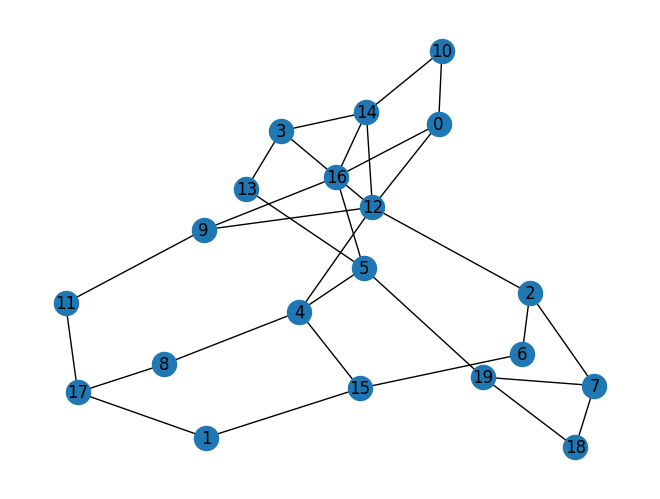

In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt

# n: numero de vertices
# m: numero de arestas
def gera_grafo_nao_direcionado_conexo(n, m):
    if(m < n - 1 or m > n * (n - 1) // 2):
      return None

    grafo = nx.Graph()
    vertices = list(range(n))
    grafo.add_nodes_from(vertices)
    random.shuffle(vertices)
    for i in range(n - 1):
        grafo.add_edge(vertices[i], vertices[i + 1])

    while grafo.number_of_edges() < m:
        u, v = random.sample(vertices, 2)
        if not grafo.has_edge(u, v):
            grafo.add_edge(u, v)

    return grafo

n = 20
m = 30
grafo = gera_grafo_nao_direcionado_conexo(n, m)

if(grafo != None):
  nx.draw(grafo, with_labels=True)
  plt.show()

# Implementando o modelo com Gurobypi

In [2]:
!pip install gurobipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 72.6 MB/s eta 0:00:00


In [7]:
import gurobipy as gp
from gurobipy import GRB

# Modelo de otimização
model = gp.Model("MaxCut")

# Variáveis binárias para os vértices
x = model.addVars(grafo.nodes, vtype=GRB.BINARY, name="x")

# Variáveis binárias para as arestas (indicam se a aresta está entre partições)
z = model.addVars(grafo.edges, vtype=GRB.BINARY, name="z")

# Função objetivo: maximizar o número de arestas entre as partições
model.setObjective(gp.quicksum(z[u, v] for u, v in grafo.edges), GRB.MAXIMIZE)

# Restrições: uma aresta (u, v) conta se os vértices estão em partições diferentes
for u, v in grafo.edges:
    model.addConstr(z[u, v] <= x[u] + x[v])
    model.addConstr(z[u, v] <= 2 - (x[u] + x[v]))

# Resolver o modelo
model.optimize()

# Imprimir a solução
if model.status == GRB.OPTIMAL:
    print("Valor ótimo da função objetivo:", model.objVal)
    print("Partição dos vértices:")
    V1 = [i for i in grafo.nodes if x[i].x > 0.5]
    V2 = [i for i in grafo.nodes if x[i].x <= 0.5]
    print("V1:", V1)
    print("V2:", V2)

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 60 rows, 50 columns and 180 nonzeros
Model fingerprint: 0x1cecef6e
Variable types: 0 continuous, 50 integer (50 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Found heuristic solution: objective -0.0000000
Presolve removed 14 rows and 14 columns
Presolve time: 0.00s
Presolved: 46 rows, 36 columns, 138 nonzeros
Found heuristic solution: objective 7.0000000
Variable types: 0 continuous, 36 integer (29 binary)
Found heuristic solution: objective 14.0000000

Root relaxation: objective 3.000000e+01, 14 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 E